<center><h1>SVM - Escenario experimental 1</header1></center>


In [19]:
import pandas as pd
import numpy as np

In [20]:
datapath = 'https://raw.githubusercontent.com/rcarmas/datasets-Internetworking/main/SelectedFeatures-10s-TOR-NonTOR.csv'
names = ['Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Flow Duration', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min','Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min','Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min','Active Mean', 'Active Std', 'Active Max', 'Active Min','Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min','label']
#Lee los datos del csv
dataframe  = pd.read_csv(datapath,names=names,low_memory=False)

In [21]:
dataframe.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,10.0.2.15,53913,216.58.208.46,80,6,435,0.0,4597.701149,435.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
1,10.0.2.15,53913,216.58.208.46,80,6,259,0.0,7722.007722,259.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
2,10.0.2.15,53913,216.58.208.46,80,6,891,0.0,2244.668911,891.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
3,10.0.2.15,53913,216.58.208.46,80,6,1074,0.0,1862.197393,1074.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
4,10.0.2.15,53913,216.58.208.46,80,6,315,0.0,6349.206349,315.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR


In [22]:
# Normalise the data
def dfNormalize(df):
    for feature_name in df.columns:
        df.loc[:,feature_name]= pd.to_numeric(df.loc[:,feature_name], errors='coerce').fillna(0)
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()   
        if (max_value - min_value) > 0:
            df.loc[:,feature_name] = (df.loc[:,feature_name] - min_value) / (max_value - min_value)
        else:
            df.loc[:,feature_name] = (df.loc[:,feature_name]- min_value)    
    return df

In [23]:
print (dataframe.shape)
dataframe = dataframe.reindex(np.random.permutation(dataframe.index)).copy()
print(dataframe.describe())
print (list(dataframe))

(67834, 29)
        Source Port  Destination Port      Protocol  Flow Duration  \
count  67834.000000      67834.000000  67834.000000   6.783400e+04   
mean   37912.753324      11566.395967     12.167291   2.991884e+06   
std    20986.077326      18374.765123      5.459410   4.063005e+06   
min       21.000000         21.000000      6.000000   0.000000e+00   
25%    19305.000000        137.000000      6.000000   4.435975e+04   
50%    43677.000000        443.000000     17.000000   4.108570e+05   
75%    54685.000000      16311.000000     17.000000   7.325550e+06   
max    65534.000000      65514.000000     17.000000   1.000000e+07   

       Flow Bytes/s  Flow Packets/s  Flow IAT Mean  Flow IAT Std  \
count  6.783200e+04    6.783400e+04   6.783400e+04  6.783400e+04   
mean            inf             inf   3.155927e+05  2.209662e+05   
std             NaN             NaN   6.988069e+05  6.409506e+05   
min    0.000000e+00    2.002581e-01   0.000000e+00  0.000000e+00   
25%    1.046553e+

In [24]:
keys = dataframe.keys()
# Feature Selection, Dropping Source IP, Source Port, Destination IP and Destination Port as it 
# specific to each organisation network and generic model should not contain them. 
data_to_process = dataframe[keys[4:len(keys) - 1]].copy()
#data_to_process = dataframe[[' Source Port',' Destination Port', ' Flow Duration', ' Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean','Fwd IAT Mean','Bwd IAT Mean','Active Mean','Idle Mean','label']].copy()
# do a data normalization
x_normalised = dfNormalize(data_to_process)
print(x_normalised.describe())

           Protocol  Flow Duration  Flow Bytes/s  Flow Packets/s  \
count  67834.000000   67834.000000       67830.0         67828.0   
mean       0.560663       0.299188           0.0             0.0   
std        0.496310       0.406300           0.0             0.0   
min        0.000000       0.000000           0.0             0.0   
25%        0.000000       0.004436           0.0             0.0   
50%        1.000000       0.041086           0.0             0.0   
75%        1.000000       0.732555           0.0             0.0   
max        1.000000       1.000000           0.0             0.0   

       Flow IAT Mean  Flow IAT Std  Flow IAT Max  Flow IAT Min  Fwd IAT Mean  \
count   67834.000000  67834.000000  67834.000000  67834.000000  67834.000000   
mean        0.031600      0.031363      0.089855      0.019491      0.035016   
std         0.069971      0.090973      0.173880      0.057865      0.083937   
min         0.000000      0.000000      0.000000      0.000000     

In [25]:
change_labels = lambda x: 1 if x == 'nonTOR' else 0

In [26]:
y_normalised = dataframe['label'].apply(change_labels)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x_normalised, y_normalised, test_size=0.3, random_state=42)

In [29]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [30]:
#Escalar los datos utilizando StandardScaler.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [31]:
#Entrenar un modelo SVM utilizando SVC de sklearn.
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [32]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, make_scorer

scoring      = {'accuracy' : make_scorer(accuracy_score),
                'f1_score' : make_scorer(f1_score, average = 'weighted'), 
                'precision' : make_scorer(precision_score, average = 'weighted'),
                'recall' : make_scorer(recall_score, average = 'weighted')}

In [33]:
# Evaluar el modelo utilizando validación cruzada.

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_validate
import numpy as np
linear_grid = SVC(kernel='linear', random_state=42)
scoring = ['accuracy', 'f1', 'precision', 'recall']
results = cross_validate(estimator=linear_grid, X=X_train_scaled, y=y_train, cv=6, scoring=scoring)
print('Accuracy (Linear Kernel): ', "%.5f" % (np.mean(results['test_accuracy'])*100))
print('F1 (Linear Kernel): ', "%.5f" % (np.mean(results['test_f1'])*100))
print('Precision (Linear Kernel): ', "%.5f" % (np.mean(results['test_precision'])*100))
print('Recall (Linear Kernel): ', "%.5f" % (np.mean(results['test_recall'])*100))

Accuracy (Linear Kernel):  93.93047
F1 (Linear Kernel):  96.58917
Precision (Linear Kernel):  95.58039
Recall (Linear Kernel):  97.61962


## Gráfico Roc Curve

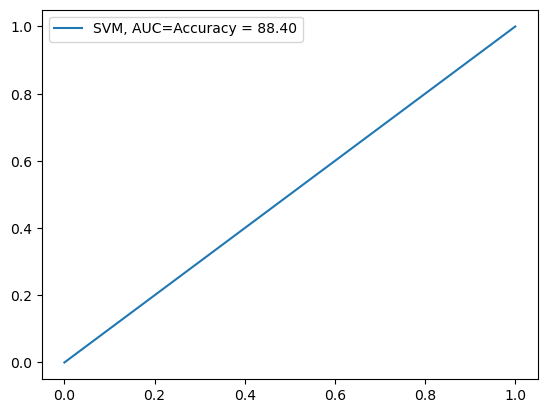

In [35]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.impute import SimpleImputer
# Crear un objeto SimpleImputer para reemplazar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
# Imputar valores faltantes en X_test
X_test = imputer.fit_transform(X_test)
y_pred = svm.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
LR = "Accuracy = {:.2f}".format(svm.score(X_test, y_test.values)*100)
plt.plot(fpr,tpr,label="SVM, AUC="+str(LR))
plt.legend()